<a href="https://colab.research.google.com/github/ousstachdz/ids_ai/blob/multiclass/multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from google.colab import drive
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import tensorflow as tf
import joblib
import json
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH_TO_DATASET = '/content/drive/MyDrive/kddcup/kddcup.data'
PATH_TO_SAVE = '/content/drive/MyDrive/model_multiclass_classification/'

##data visualizations

In [ ]:
df = pd.read_csv(PATH_TO_DATASET)
df.columns = [
  'duration',
  'protocol_type',
  'service',
  'flag',
  'src_bytes',
  'dst_bytes',
  'land',
  'wrong_fragment',
  'urgent',
  'hot',
  'num_failed_logins',
  'logged_in',
  'num_compromised',
  'root_shell',
  'su_attempted',
  'num_root',
  'num_file_creations',
  'num_shells',
  'num_access_files',
  'num_outbound_cmds',
  'is_host_login',
  'is_guest_login',
  'count',
  'srv_count',
  'serror_rate',
  'srv_serror_rate',
  'rerror_rate',
  'srv_rerror_rate',
  'same_srv_rate',
  'diff_srv_rate',
  'srv_diff_host_rate',
  'dst_host_count',
  'dst_host_srv_count',
  'dst_host_same_srv_rate',
  'dst_host_diff_srv_rate',
  'dst_host_same_src_port_rate',
  'dst_host_srv_diff_host_rate',
  'dst_host_serror_rate',
  'dst_host_srv_serror_rate',
  'dst_host_rerror_rate',
  'dst_host_srv_rerror_rate',
  'lable'
]
df.info(memory_usage='deep' )
pd.set_option('display.max_columns', 42)
pd.set_option('display.max_rows', 5)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898430 entries, 0 to 4898429
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19  

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,lable
0,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,2,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898428,0,tcp,http,SF,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,35,0.0,0.0,0.0,0.0,1.0,0.0,0.14,6,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1098,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,7,255,1.0,0.0,0.14,0.05,0.0,0.01,0.0,0.0,normal.


In [ ]:
pd.set_option('display.max_rows', 23)
df["lable"].value_counts()

smurf.              2807886
neptune.            1072017
normal.              972780
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: lable, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
for column in df.columns :
  if len(np.unique(df[column])) < 2:
    print(column)
    df.pop(column)

num_outbound_cmds


In [ ]:
numerical_columns = [
  "duration",
  "src_bytes",
  "dst_bytes",
  "wrong_fragment",
  "urgent",
  "hot",
  "num_failed_logins",
  "num_compromised",
  "root_shell",
  "su_attempted",
  "num_root",
  "num_file_creations",
  "num_shells",
  "num_access_files",
  "num_outbound_cmds",
  "count",
  "srv_count",
  "serror_rate",
  "srv_serror_rate",
  "rerror_rate",
  "srv_rerror_rate",
  "same_srv_rate",
  "diff_srv_rate",
  "srv_diff_host_rate",
  "dst_host_count",
  "dst_host_srv_count",
  "dst_host_same_srv_rate",
  "dst_host_diff_srv_rate",
  "dst_host_same_src_port_rate",
  "dst_host_srv_diff_host_rate",
  "dst_host_serror_rate",
  "dst_host_srv_serror_rate",
  "dst_host_rerror_rate",
  "dst_host_srv_rerror_rate",
]

symbolic_columns = [
  "protocol_type",
  "service",
  "flag",
  "land",
  "logged_in",
  "is_host_login",
  "is_guest_login",
]

In [ ]:
zscore_encoder = {}

def zscore_encode(df, name, mean=None, sd=None):
    print(f"---------------------------------------\n {name} -> zscore_encode \n")
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    if mean is not None and sd is not None:

        zscore_encoder[name]=  {'mean':mean, 'sd':sd}
        df[name] = (df[name] - mean) / sd
    else:
        raise Exception('Missing mean or standard deviation')

def label_encode(df, name):
    print(f"---------------------------------------\n {name} -> label_encode \n")
    label_encoder = LabelEncoder()
    df[name] = label_encoder.fit_transform(df[name])
    joblib.dump(label_encoder, f'{PATH_TO_SAVE}/encoders/{name}_mapping.pkl')
    if name != 'lable':
      zscore_encode(df, name)

In [ ]:
def encode(df):
    for name in df.columns:
        if name in numerical_columns:
            zscore_encode(df, name)
        elif name == 'lable' :
          pass
        else :
            label_encode(df, name)
    with open(f'{PATH_TO_SAVE}/encoders/zscore_mapping.json', 'w') as f:
      json.dump(zscore_encoder, f)
    return df

df = encode(df)

---------------------------------------
 duration -> zscore_encode 

---------------------------------------
 protocol_type -> label_encode 

---------------------------------------
 protocol_type -> zscore_encode 

---------------------------------------
 service -> label_encode 

---------------------------------------
 service -> zscore_encode 

---------------------------------------
 flag -> label_encode 

---------------------------------------
 flag -> zscore_encode 

---------------------------------------
 src_bytes -> zscore_encode 

---------------------------------------
 dst_bytes -> zscore_encode 

---------------------------------------
 land -> label_encode 

---------------------------------------
 land -> zscore_encode 

---------------------------------------
 wrong_fragment -> zscore_encode 

---------------------------------------
 urgent -> zscore_encode 

---------------------------------------
 hot -> zscore_encode 

---------------------------------------
 num_

In [ ]:

df.replace(to_replace=["smurf.",], value="Smurf Attacks", inplace=True)
df.replace(to_replace=["neptune.",], value="Neptune Attacks", inplace=True)
df.replace(to_replace=['imap.','multihop.','phf.','perl.','spy.','satan.','guess_passwd.',], value="Reconnaissance Attacks", inplace=True)
df.replace(to_replace=['ipsweep.','portsweep.','nmap.',], value="Probe Attacks", inplace=True)
df.replace(to_replace=['back.','warezmaster.','warezclient.', "teardrop.","pod.",'buffer_overflow.','rootkit.','loadmodule.','ftp_write.','land.'], value="Other Attacks", inplace=True)

In [ ]:
pd.set_option('display.max_rows', 23)
df["lable"].value_counts()

Smurf Attacks             2807886
Neptune Attacks           1072017
normal.                    972780
Probe Attacks               25210
Reconnaissance Attacks      15973
Other Attacks                4564
Name: lable, dtype: int64

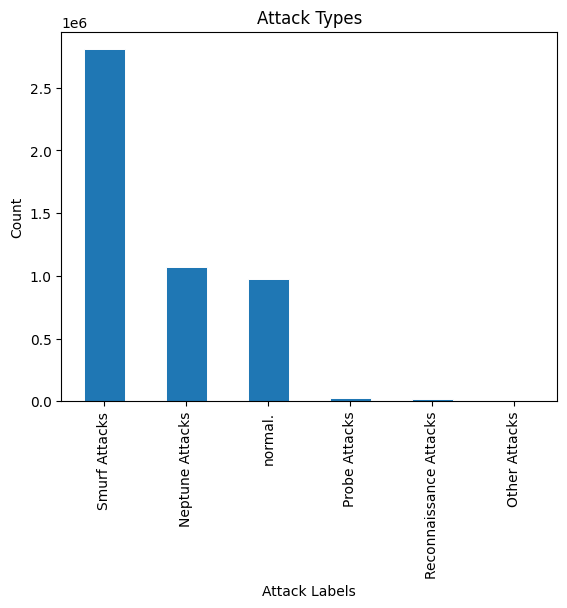

In [ ]:
fig, ax = plt.subplots()

ax.bar(df["lable"].value_counts().index, df["lable"].value_counts().values, width=0.5, edgecolor="white", linewidth=0.7)

ax.set_title("Attack Types")
ax.set_xlabel("Attack Labels")
ax.set_ylabel("Count")
ax.tick_params(axis='x', rotation=90)
plt.show()

In [ ]:
df1 = df[df["lable"] == "Smurf Attacks"][:4564]
df2 = df[df["lable"] == "Neptune Attacks"][:4564]
# df3 = df[df["lable"] == "normal."][:0]
df4 = df[df["lable"] == "Probe Attacks"][:4564]
df5 = df[df["lable"] == "Reconnaissance Attacks"][:4564]
df6 = df[df["lable"] == "Other Attacks"][:4564]

df = pd.concat([ df1,df2,df4,df5,df6], axis =0)

In [ ]:
pd.set_option('display.max_rows', 23)
df["lable"].value_counts()

Smurf Attacks             4564
Neptune Attacks           4564
Probe Attacks             4564
Reconnaissance Attacks    4564
Other Attacks             4564
Name: lable, dtype: int64

In [ ]:
pd.set_option('display.max_columns', 41)
pd.set_option('display.max_rows', 5)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,lable
77906,-0.066833,-0.805515,-0.695543,0.516555,-0.000853,-0.001695,-0.002391,-0.015139,-0.001103,-0.026521,-0.004391,-0.409367,-0.002097,-0.008258,-0.004546,-0.003285,-0.009572,-0.008505,-0.028756,-0.000639,-0.028911,-1.575415,-1.196243,-0.466043,-0.465756,-0.248286,-0.24813,0.539733,-0.256057,-0.201059,-1.358637,-1.777069,-1.808703,-0.098681,-1.237146,-0.156668,-0.466405,-0.465454,-0.250832,-0.249632,Smurf Attacks
77907,-0.066833,-0.805515,-0.695543,0.516555,-0.000853,-0.001695,-0.002391,-0.015139,-0.001103,-0.026521,-0.004391,-0.409367,-0.002097,-0.008258,-0.004546,-0.003285,-0.009572,-0.008505,-0.028756,-0.000639,-0.028911,-0.094219,0.080217,-0.466043,-0.465756,-0.248286,-0.24813,0.539733,-0.256057,-0.201059,-1.343017,-1.767628,-1.808703,-0.098681,-1.237146,-0.156668,-0.466405,-0.465454,-0.250832,-0.249632,Smurf Attacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867869,-0.066833,2.687587,1.596454,0.516555,-0.001919,-0.001695,-0.002391,69.989437,-0.001103,-0.026521,-0.004391,-0.409367,-0.002097,-0.008258,-0.004546,-0.003285,-0.009572,-0.008505,-0.028756,-0.000639,-0.028911,-1.429183,-1.070223,-0.466043,-0.465756,-0.248286,-0.24813,0.539733,-0.256057,-0.201059,0.343933,-0.851779,-0.884547,-0.190810,-0.447105,-0.156668,-0.466405,-0.465454,-0.250832,-0.249632,Other Attacks
4867870,-0.066833,2.687587,1.596454,0.516555,-0.001919,-0.001695,-0.002391,69.989437,-0.001103,-0.026521,-0.004391,-0.409367,-0.002097,-0.008258,-0.004546,-0.003285,-0.009572,-0.008505,-0.028756,-0.000639,-0.028911,-1.424465,-1.066158,-0.466043,-0.465756,-0.248286,-0.24813,0.539733,-0.256057,-0.201059,0.343933,-0.842338,-0.884547,-0.190810,-0.447105,-0.156668,-0.466405,-0.465454,-0.250832,-0.249632,Other Attacks


In [ ]:
df.info(memory_usage='deep' )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22820 entries, 77906 to 4867870
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22820 non-null  float64
 1   protocol_type                22820 non-null  float64
 2   service                      22820 non-null  float64
 3   flag                         22820 non-null  float64
 4   src_bytes                    22820 non-null  float64
 5   dst_bytes                    22820 non-null  float64
 6   land                         22820 non-null  float64
 7   wrong_fragment               22820 non-null  float64
 8   urgent                       22820 non-null  float64
 9   hot                          22820 non-null  float64
 10  num_failed_logins            22820 non-null  float64
 11  logged_in                    22820 non-null  float64
 12  num_compromised              22820 non-null  float64
 13  root_shell

In [ ]:
x_columns = df.columns.drop('lable')
dummies = pd.get_dummies(df['lable'])
lable = dummies.columns

df_x = df[x_columns].values
df_y = dummies.values

del df, x_columns, dummies
df_x = df_x.astype('float32')
df_y = df_y.astype('float32')

In [ ]:
one_hot_encoder = list(lable)
with open(f'{PATH_TO_SAVE}encoders/one_hot_mapping.json', 'w') as f:
    json.dump(one_hot_encoder, f)
with open(f'{PATH_TO_SAVE}encoders/zscore_mapping.json', 'w') as f:
    json.dump(zscore_encoder, f)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=50)
del df_x, df_y

In [ ]:
x_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
print('the shape of y_train : ' ,y_train.shape)
print('the shape of x_train : ' ,X_train.shape)
print('the shape of y_test : ' ,y_test.shape)
print('the shape of x_test : ' ,X_test.shape)

the shape of y_train :  (18256, 5)
the shape of x_train :  (18256, 40)
the shape of y_test :  (4564, 5)
the shape of x_test :  (4564, 40)


In [ ]:
cnn = Sequential()
cnn.add(Convolution1D(64, 3, activation="relu", input_shape=(X_train.shape[1], 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Convolution1D(64, 3, activation="relu"))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(5, activation="softmax"))

loss_fn = keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction="auto",
    name="categorical_crossentropy",
)
cnn.compile(loss=loss_fn, optimizer="adam", metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 64)            12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 64)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               1

In [ ]:
es_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
es_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
history  =  cnn.fit(
                X_train,
                y_train,
                epochs=100, batch_size=32,
                callbacks= es_callback,
                 validation_data=(X_test, y_test)
                )

Epoch 1/100
571/571 [==============================] - 8s 13ms/step - loss: 0.1133 - accuracy: 0.9848 - val_loss: 0.0194 - val_accuracy: 0.9976
Epoch 2/100
571/571 [==============================] - 5s 10ms/step - loss: 0.0335 - accuracy: 0.9961 - val_loss: 0.0304 - val_accuracy: 0.9974
Epoch 3/100
571/571 [==============================] - 6s 10ms/step - loss: 0.0192 - accuracy: 0.9972 - val_loss: 0.0191 - val_accuracy: 0.9974
Epoch 4/100
571/571 [==============================] - 7s 11ms/step - loss: 0.0128 - accuracy: 0.9974 - val_loss: 0.0155 - val_accuracy: 0.9961
Epoch 5/100
571/571 [==============================] - 5s 9ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 0.0143 - val_accuracy: 0.9954
Epoch 6/100
571/571 [==============================] - 7s 12ms/step - loss: 0.0098 - accuracy: 0.9975 - val_loss: 0.0133 - val_accuracy: 0.9982
Epoch 7/100
571/571 [==============================] - 5s 10ms/step - loss: 0.0089 - accuracy: 0.9979 - val_loss: 0.0080 - val_accuracy: 

In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)

print("Accuracy: ", accuracy)
print("Loss: ", loss)

143/143 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9978
Accuracy:  0.9978089332580566
Loss:  0.010014028288424015


In [ ]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


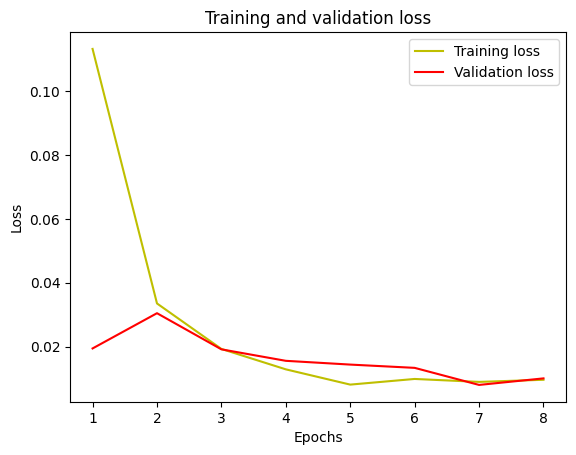

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

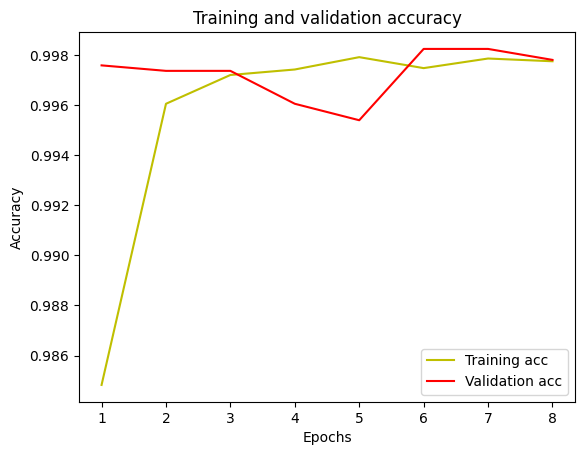

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

143/143 [==============================] - 1s 3ms/step


<Axes: >

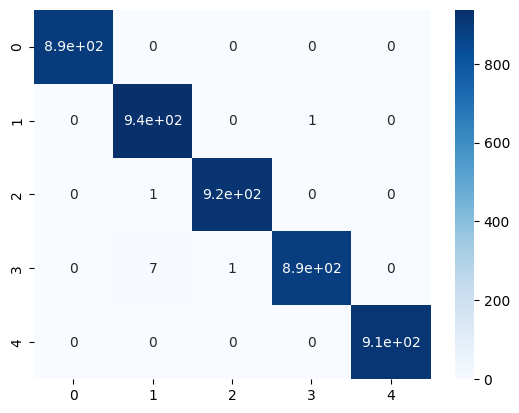

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

sns.heatmap(cm, annot=True, cmap="Blues")


In [ ]:
cnn.save(f'{PATH_TO_SAVE}model')
model_json = cnn.to_json()
with open(f'{PATH_TO_SAVE}model/model_architecture.json', 'w') as json_file:
    json_file.write(model_json)
cnn.save_weights(f'{PATH_TO_SAVE}model/model_weights.h5')

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import model_from_json

# Load the model architecture from a JSON file
with open(f'{PATH_TO_SAVE}model/model_architecture.json', 'r') as json_file:
    loaded_model_json = json_file.read()

# Create the model from the loaded architecture
loaded_model = model_from_json(loaded_model_json)

# Load the model weights
loaded_model.load_weights(f'{PATH_TO_SAVE}model/model_weights.h5')


# Prepare new data for prediction
# new_data = np.expand_dims(X_test[2], axis=0)

# Make predictions with the loaded model

# predictions = loaded_model.predict(new_data)


In [ ]:
import time
new_data = X_test[:1000]
start_time = time.time()
for i in range(len(new_data)):
  predictions = loaded_model.predict( np.expand_dims(X_test[i], axis=0))
elapsed_time = time.time() - start_time
print(f"Execution time: {elapsed_time} seconds")

1/1 [==============================] - 0s 23ms/step
Execution time: 82.31568694114685 seconds


In [ ]:
print(predictions)

[[2.7058711e-12 2.0003951e-10 2.2378316e-08 1.0000000e+00 6.2459794e-11]]
